<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/5_SiPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: Silicon Photomultipliers (SiPM)

### October 11th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 11/10/2021


## Configuration

### Clone the GIT

In [1]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

GitHub uservaleriopaagliarino
GitHub emailvalerio.pagliarino@edu.unito.it
GitHub password··········
Cloning into 'Electronics-2021-UNITO'...
remote: Enumerating objects: 2051, done.
remote: Counting objects: 100% (2051/2051), done.
remote: Compressing objects: 100% (1504/1504), done.
remote: Total 2051 (delta 1098), reused 1173 (delta 518), pack-reused 0
Receiving objects: 100% (2051/2051), 87.84 MiB | 15.08 MiB/s, done.
Resolving deltas: 100% (1098/1098), done.


### Install environment

In [2]:
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

Start config for JupyROOT Env. on Google Coolab - It takes about 3 minutes
WGET...
Done.
UNZIP...
TAR...
APT...
Installation completed.
Shared objects loaded.
Welcome to JupyROOT 6.14/04
Completed!


### Importa moduli [no COLAB]

In [ ]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

DATADIR = "../data-source"
OUTPUTDIR = "./output"

### Importa moduli [COLAB]

In [3]:
%cd /content/
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle#Pickle with dict of Numpy arrays

# Variables for directories
DATADIR = "/content/Electronics-2021-UNITO/data-source"
OUTPUTDIR = "/content/Electronics-2021-UNITO/analysis/output"

/content
     |████████████████████████████████| 98 kB 2.5 MB/s 


## SiPM

### SiPM $1$ $mm^2$

In [41]:
from uncertainties import ufloat

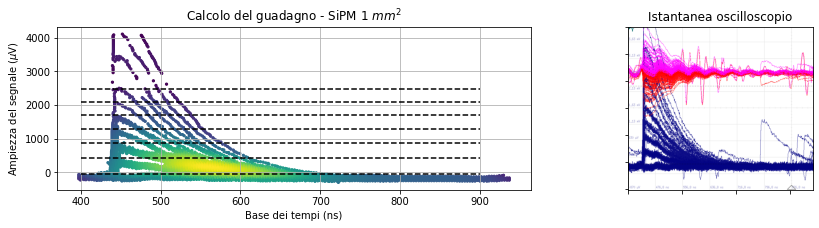

In [44]:
from scipy.stats import gaussian_kde
import cv2
im = cv2.imread(f'{DATADIR}/11-10-21/GAIN1Z.PNG')
im = cv2.bitwise_not(im)

SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_1mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 3), gridspec_kw={'width_ratios': [4, 2]})

tv = np.vstack([t,v])
z = gaussian_kde(tv)(tv)
ax[0].set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo del guadagno - SiPM 1 $mm^2$')

ax[0].scatter(t,v, c = z, s = 5)
ax[0].grid(which='both')

#---------------------
levels_1mm = [-40.31028, 431.64327, 881.150748, 1281.24983, 1695.97721, 2080.30269, 2481.52727]
tau1 = 1.11666196e-07 #280.712e-9  #s
tau1e= 2.05289191e-09 #s
#Da misure con cursori / vedere fit in fondo al notebook

for l in levels_1mm:
  ax[0].hlines(l, 400, 900, linestyles="--")

ax[1].imshow(im)
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])
ax[1].set(title = "Istantanea oscilloscopio")
plt.savefig(f"{OUTPUTDIR}/SiPM_1mm_gain_staircase.pdf")
tau1 = ufloat(tau1, tau1e)

### SiPM $3$ $mm^2$

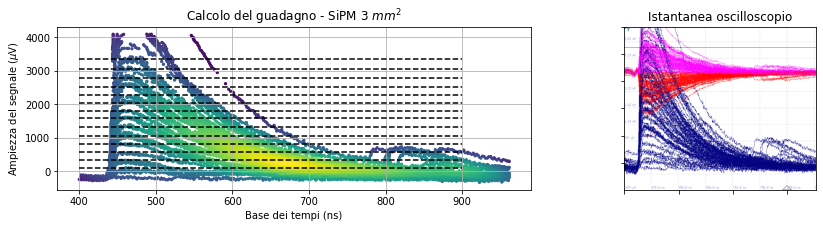

In [45]:
from scipy.stats import gaussian_kde
import cv2
im = cv2.imread(f'{DATADIR}/11-10-21/GAIN3Z.PNG')
im = cv2.bitwise_not(im)

SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_3mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 3), gridspec_kw={'width_ratios': [4, 2]})
tv = np.vstack([t,v])
z = gaussian_kde(tv)(tv)
ax[0].set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo del guadagno - SiPM 3 $mm^2$')

ax[0].scatter(t,v, c = z, s = 5)
ax[0].grid(which='both')

#---------------------
levels_3mm = [100.16667, 348.91667, 581.08333, 829.8333, 1062.000, 1335.625, 1600.9583, 1816.5417, 2048.7083, 2272.5833, 2513.0417, 2786.6667, 3068.5833, 3342.2083]
tau3 = 1.88148237e-07 #468.712e-9  #s
tau3e= 9.91530963e-09 # s
#Da misure con cursori / vedere fit in fondo al notebook

for l in levels_3mm:
  ax[0].hlines(l, 400, 900, linestyles="--")

ax[1].imshow(im)
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])
ax[1].set(title = "Istantanea oscilloscopio")
plt.savefig(f"{OUTPUTDIR}/SiPM_3mm_gain_staircase.pdf")
tau3 = ufloat(tau3, tau3e)

In [62]:
levels_1mm = np.array(levels_1mm)
levels_3mm = np.array(levels_3mm)
diff1mm = np.diff(levels_1mm)
diff3mm = np.diff(levels_3mm)
dm1     = diff1mm.mean()
dm3     = diff3mm.mean()
sdm1    = (diff1mm.max() - diff1mm.min()) / 2
sdm3    = (diff3mm.max() - diff3mm.min()) / 2

dm1v = ufloat(dm1, sdm1)
dm3v = ufloat(dm3, sdm3)

dm1 = dm1v
dm3 = dm3v

print("Distanza media 1x1mm^2 = ", dm1)
print("Distanza media 3x3mm^2 = ", dm3)

Distanza media 1x1mm^2 =  (4.2+/-0.4)e+02
Distanza media 3x3mm^2 =  249+/-33


1 $mm^2$

In [63]:
vt = dm1v * 1e-6 * 0.5 * tau1
vte = vt / 50 
G1 = vte / 1.602e-19
print("Vt = ", vt)
print("G  = ", G1)

Vt =  (2.35+/-0.25)e-11
G  =  (2.93+/-0.31)e+06


3 $mm^2$

In [64]:
vt = dm3v * 1e-6 * 0.5 * tau3
vte = vt / 50 
G3 = vte / 1.602e-19
print("Vt = ", vt)
print("G  = ", G3)

Vt =  (2.35+/-0.34)e-11
G  =  (2.9+/-0.4)e+06


Verifica compatibilità tra i due valori di guadagno e il datasheet

In [67]:
Gteo = 3.e6 #con +4 di overvolt
Z1 = (Gteo - G1.n) / G1.s
Z3 = (Gteo - G3.n) / G3.s
pvalue1 = sp.stats.norm.cdf(-abs(Z1)) *2 
pvalue3 = sp.stats.norm.cdf(-abs(Z3)) *2 
print("pVal 1 = ", pvalue1)
print("pVal 3 = ", pvalue3)

pVal 1 =  0.820697370287903
pVal 3 =  0.8653582128125408


### SiPM $1$ $mm^2$ - Costante di tempo

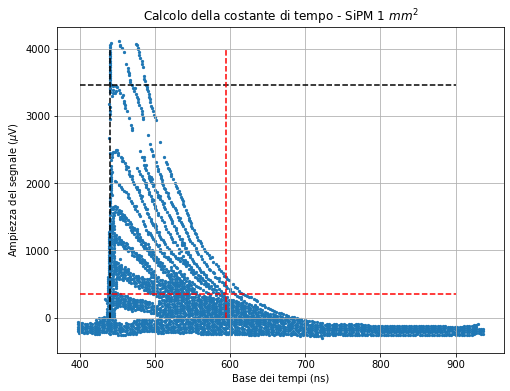

In [26]:
SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_1mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
tv = np.vstack([t,v])
ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo della costante di tempo - SiPM 1 $mm^2$')

ax.scatter(t,v,s = 5)
ax.grid(which='both')

maxL = 3460
tauL = maxL / 10
tau0 = 440
tauV = 594.2

ax.hlines(maxL, 400, 900, linestyles="--", color = "black")
ax.hlines(tauL, 400, 900, linestyles="--", color = "red")
ax.vlines(tau0, 0,  4000, linestyles="--", color = "black")
ax.vlines(tauV, 0,  4000, linestyles="--", color = "red")

tau = tauV - tau0
plt.savefig(f"{OUTPUTDIR}/SiPM_1mm_tau.pdf")

### SiPM $3$ $mm^2$ - Costante di tempo

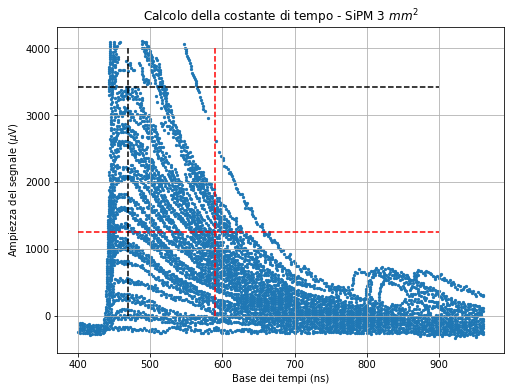

In [27]:
SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_3mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
tv = np.vstack([t,v])
ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo della costante di tempo - SiPM 3 $mm^2$')

ax.scatter(t,v,s = 5)
ax.grid(which='both')

maxL = 3420
tauL = maxL / np.exp(1)
tau0 = 470
tauV = 590

ax.hlines(maxL, 400, 900, linestyles="--", color = "black")
ax.hlines(tauL, 400, 900, linestyles="--", color = "red")
ax.vlines(tau0, 0,  4000, linestyles="--", color = "black")
ax.vlines(tauV, 0,  4000, linestyles="--", color = "red")

tau = tauV - tau0

plt.savefig(f"{OUTPUTDIR}/SiPM_3mm_tau.pdf")

### Saturazione SiPM $1$ $mm^2$

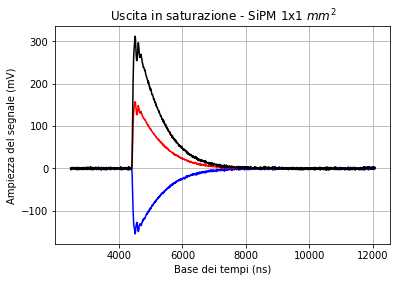

In [93]:
SiPM_1mm_sat = pd.read_csv(f'{DATADIR}/11-10-21/SAT1MM.CSV')
t  = SiPM_1mm_sat['in s'].to_numpy()
C1 = SiPM_1mm_sat['C1 in V'].to_numpy()
C2 = SiPM_1mm_sat['C2 in V'].to_numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

ax.plot(t * 10e9, C1 * 1000, color = "blue")
ax.plot(t * 10e9, C2 * 1000, color = "red")
ax.plot(t * 10e9, (C2 - C1) * 1000, color = "black")
ax.grid()

ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale (mV)',
       title='Uscita in saturazione - SiPM 1x1 $mm^2$')

plt.savefig(f"{OUTPUTDIR}/SiPM_sat_1mm.pdf")

fitted parameters: [ 1.11666196e-07  3.70859079e+00  9.99924333e-08 -1.54084652e-02]
covariance matrix: [[ 4.21436520e-18  6.13825934e-24 -1.54500813e-17 -2.45009669e-12]
 [ 6.13825934e-24  9.77841357e-30 -2.19377439e-23 -3.87130428e-18]
 [-1.54500813e-17 -2.19377439e-23  5.71511780e-17  8.77945254e-12]
 [-2.45009669e-12 -3.87130428e-18  8.77945254e-12  1.53378054e-06]]
std errors:  [2.05289191e-09 3.12704550e-15 7.55983981e-09 1.23845894e-03]
Chisquare / ndf =  102.46287836051116  /  300
0.34154292786837054
pvalue =  1.0


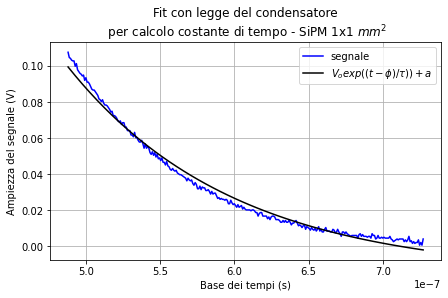

In [95]:
from scipy.optimize import curve_fit
i = 300
o = 600
fig, ax = plt.subplots(figsize = (7,4))

xData = t[i:o]
yData = C2[i:o]

def standardFunc(data, tau, Vo, phi, a):
    return Vo * np.exp(-(data-phi) / tau) + a


# some initial parameter values - must be within bounds
initialParameters = np.array([6e-9, 0.1, 0., 0.])

# bounds on parameters - initial parameters must be within these
lowerBounds = (5e-9, -5., -1e-7, -5)
upperBounds = (500e-9, 5., 1e-7, 5)
parameterBounds = [lowerBounds, upperBounds]

fittedParameters, pcov = curve_fit(standardFunc, xData, yData, initialParameters, bounds = parameterBounds)

# values for display of fitted function
tau, Vo, phi, a = fittedParameters

# for plotting the fitting results
xPlotData = np.linspace(min(xData), max(xData), 50)
y_plot = standardFunc(xPlotData, tau, Vo, phi, a)

ax.plot(xData, yData, color="blue", label = "segnale") # plot the raw data as a scatterplot
ax.plot(xPlotData, y_plot, color="Black", label = "$V_o exp((t-\phi) / \\tau)) + a$") # plot the equation using the fitted parameters
ax.grid()
ax.legend()

ax.set(xlabel='Base dei tempi (s)', ylabel='Ampiezza del segnale (V)',
       title='Fit con legge del condensatore\n per calcolo costante di tempo - SiPM 1x1 $mm^2$')


print('fitted parameters:', fittedParameters)
print('covariance matrix:', pcov)
print('std errors: ', np.sqrt(np.diag(pcov)))

plt.savefig(f"{OUTPUTDIR}/SiPM_fit_1mm.pdf")

#Compute chisquare
vrt_err = 50e-3 / 10. #Assumiamo un errore pari a 1/10 della divisione verticale. #(10 * 50e-3) / (2**10) # 10bit scope
csq = np.sum(((standardFunc(xData, tau, Vo, phi, a) - yData) / vrt_err)**2)
ndf = len(xData)
print('Chisquare / ndf = ', csq, ' / ', ndf)
print(csq / ndf)
pvalue = 1 - sp.stats.chi2.cdf(csq, df = ndf - 4)
print("pvalue = ", pvalue)

### Saturazione SiPM $3$ $mm^2$

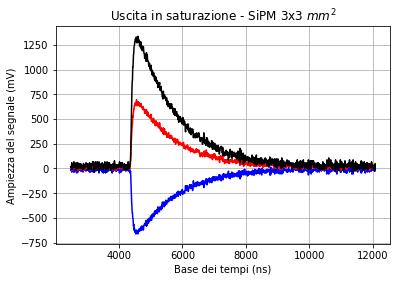

In [90]:
SiPM_3mm_sat = pd.read_csv(f'{DATADIR}/11-10-21/SAT3MM.CSV')
t  = SiPM_3mm_sat['in s'].to_numpy()
C1 = SiPM_3mm_sat['C1 in V'].to_numpy()
C2 = SiPM_3mm_sat['C2 in V'].to_numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

ax.plot(t * 10e9, C1 * 1000, color = "blue")
ax.plot(t * 10e9, C2 * 1000, color = "red")
ax.plot(t * 10e9, (C2 - C1) * 1000, color = "black")
ax.grid()

ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale (mV)',
       title='Uscita in saturazione - SiPM 3x3 $mm^2$')

plt.savefig(f"{OUTPUTDIR}/SiPM_sat_3mm.pdf")

fitted parameters: [ 1.88148237e-07  5.00000000e+00  1.00000000e-07 -1.01375207e-01]
covariance matrix: [[ 9.83133650e-17  5.41817708e-20 -1.56169766e-16 -2.05826447e-10]
 [ 5.41817708e-20  3.06308378e-23 -8.46619645e-20 -1.16360304e-13]
 [-1.56169766e-16 -8.46619645e-20  2.50975005e-16  3.21616055e-10]
 [-2.05826447e-10 -1.16360304e-13  3.21616055e-10  4.42029056e-04]]
std errors:  [9.91530963e-09 5.53451333e-12 1.58421907e-08 2.10244871e-02]
Chisquare / ndf =  11.514234971791572  /  300
0.03838078323930524
pvalue =  1.0


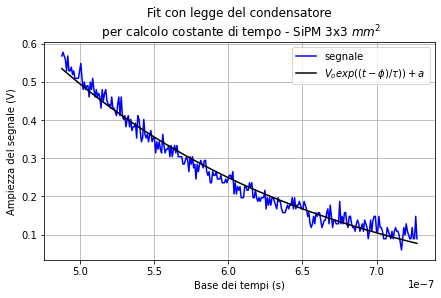

In [92]:
from scipy.optimize import curve_fit

i = 300
o = 600
fig, ax = plt.subplots(figsize = (7,4))

xData = t[i:o]
yData = C2[i:o]

def standardFunc(data, tau, Vo, phi, a):
    return Vo * np.exp(-(data-phi) / tau) + a



# some initial parameter values - must be within bounds
initialParameters = np.array([10e-9, 0.1, 0., 0.])

# bounds on parameters - initial parameters must be within these
lowerBounds = (5e-9, -5., -1e-7, -5)
upperBounds = (500e-9, 5., 1e-7, 5)
parameterBounds = [lowerBounds, upperBounds]

fittedParameters, pcov = curve_fit(standardFunc, xData, yData, initialParameters, bounds = parameterBounds)

# values for display of fitted function
tau, Vo, phi, a = fittedParameters

# for plotting the fitting results
xPlotData = np.linspace(min(xData), max(xData), 50)
y_plot = standardFunc(xPlotData, tau, Vo, phi, a)
ax.grid()

ax.plot(xData, yData, color = "blue", label="segnale") # plot the raw data as a scatterplot
ax.plot(xPlotData, y_plot, color = "black", label = "$V_o exp((t-\phi) / \\tau)) + a$") # plot the equation using the fitted parameters

ax.legend()
ax.set(xlabel='Base dei tempi (s)', ylabel='Ampiezza del segnale (V)',
       title='Fit con legge del condensatore\n per calcolo costante di tempo - SiPM 3x3 $mm^2$')

print('fitted parameters:', fittedParameters)
print('covariance matrix:', pcov)
print('std errors: ', np.sqrt(np.diag(pcov)))

plt.savefig(f"{OUTPUTDIR}/SiPM_fit_3mm.pdf")

#Compute chisquare
vrt_err = 1. / 10. #Assumiamo un errore pari a 1/10 della divisione verticale. #(10 * 50e-3) / (2**10) # 10bit scope
csq = np.sum(((standardFunc(xData, tau, Vo, phi, a) - yData) / vrt_err)**2)
ndf = len(xData)
print('Chisquare / ndf = ', csq, ' / ', ndf)
print(csq / ndf)
pvalue = 1 - sp.stats.chi2.cdf(csq, df = ndf - 4)
print("pvalue = ", pvalue)

### LED pulse

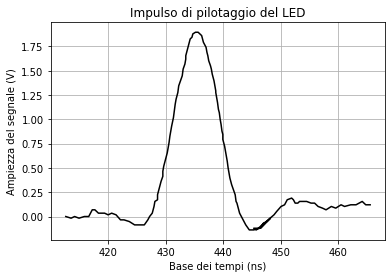

In [104]:
ledp = pd.read_csv(f'{DATADIR}/11-10-21/LED_pulse.csv')
time = ledp['time'].to_numpy()
sign = ledp[' signal'].to_numpy()

fig, ax = plt.subplots()
ax.plot(time, sign, color = "black")
ax.grid()
ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale (V)',
       title='Impulso di pilotaggio del LED')

plt.savefig(f"{OUTPUTDIR}/SiPM_ledp.pdf")

## Commit changes

In [105]:
%cd /content/Electronics-2021-UNITO/
!git pull
!git add .
!git commit -m "Plots from data analysis"
!git push 

/content/Electronics-2021-UNITO
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/valeriopagliarino/Electronics-2021-UNITO
   08649df..65d0eb5  main       -> origin/main
Updating 08649df..65d0eb5
Fast-forward
 lab-reports/analog.tex | 23 ++++++++++++++++-------
 1 file changed, 16 insertions(+), 7 deletions(-)
[main 45ba4e2] Plots from data analysis
 2 files changed, 137 insertions(+)
 create mode 100644 analysis/output/SiPM_ledp.pdf
 create mode 100644 data-source/11-10-21/LED_pulse.csv
Counting objects: 8, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 11.23 KiB | 11.23 MiB/s, done.
Total 8 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/valeri